# Basic Implementation of Marvin

Preliminary Code

In [1]:
# Import libraries
import numpy as np
import marvin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

[INFO]: No release version set. Setting default to DR17


In [3]:
from marvin import config
config.access

'public'

In [4]:
config.setDR('DR17')
config.release

'DR17'

Code taken from GitHub Issues page to fix API error

In [5]:
from marvin import config
config.switchSasUrl(sasmode='mirror')

# Demo (MaNGA ID: 8485-1901)

In [6]:
from marvin.tools import Maps

# Load in map
maps = Maps('8485-1901')

# List all possible applications of maps
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='3.1.0', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='3.1.0', unit=''>,
 <Property 'spx_ellcoo', channel='r_h_kpc', release='3.1.0', unit='kpc / h'>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='3.1.0', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='3.1.0', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='3.1.0', unit=''>,
 <Property 'binid', channel='binned_spectra', release='3.1.0', unit=''>,
 <Property 'binid', channel='stellar_continua', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_moments', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_models', release='3.1.0', unit=''>,
 <Property 'binid', channel='spectral_indices', release='3.1.0', unit=''>

###  H$\alpha$ emmission map

(<Figure size 432x288 with 2 Axes>,
 <Axes: title={'center': 'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

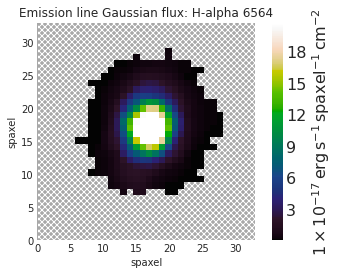

In [7]:
maps = Maps('8485-1901')

ha = maps.emline_gflux_ha_6564
ha.plot()

### Stellar Velocity Map

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)


Max stellar velocity:  66.77787  km/s
Min stellar velocity:  -347.21805  km/s


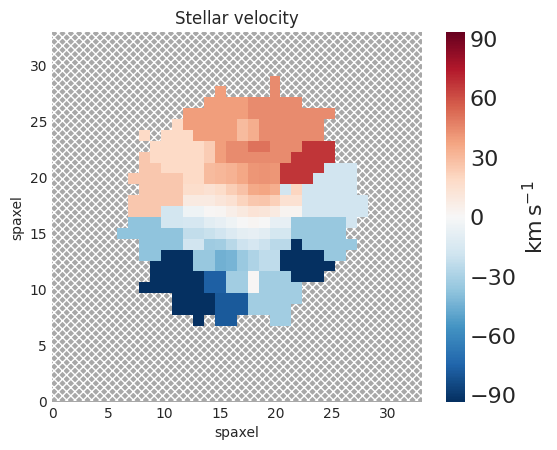

In [8]:
maps = Maps('8485-1901')

# Select and plot stellar velocity
sv = maps.stellar_vel
sv.plot()

# Find maximum and minimum value of stellar velocity
print("Max stellar velocity: ", np.max(sv.value), " km/s")
print("Min stellar velocity: ", np.min(sv.value), " km/s")

### Gas Velocity Map (H$\alpha$)

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)


gv shape:  (34, 34)
gv max:  141.33418
gv from stack:  83.72089
gv from direct slice:  83.72089
Max gas velocity:  141.33418  km/s
Min gas velocity:  -240.45087  km/s


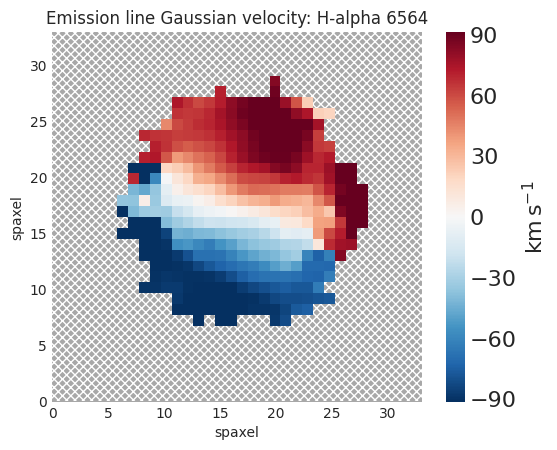

In [9]:
maps = Maps('8485-1901')

# Select and plot gas velocity
gv = maps.emline_gvel_ha_6564  # Gas velocity of H-alpha
gv.plot()

print("gv shape: ", np.shape(gv.value))
print("gv max: ", np.max(gv.value))

# Find spaxel elements where gv > 0
pos = np.where(gv.value > 0)

# Stack to obtain each spaxel position where condition applies
stack = np.column_stack((pos[0], pos[1]))
# print("stack: ", stack)

# Use stacked values to obtain gv at each point
print("gv from stack: ", gv.value[stack[0, 0], stack[0, 1]])
print("gv from direct slice: ", gv.value[13, 26])

# Find maximum and minimum value of gas velocity
print("Max gas velocity: ", np.max(gv.value), " km/s")
print("Min gas velocity: ", np.min(gv.value), " km/s")

### Normalised Stellar and Gas Velocity Maps

Use ``` np.maximum ```  and ```np.minimum``` to normalise positive and negative elements of array respectively then add together for total normalisation

In [10]:
z = np.arange(-10, 6)
print("z: ", z)

# Place positive and negative element of z into different arrays (of the same length)
z_pos = np.maximum(0, z)
z_neg = np.minimum(0, z)

# Normalise each array
z_pos_norm = z_pos/np.max(z_pos)
z_neg_norm = z_neg/np.abs(np.min(z_neg))  # Take absolute value of negative normalisation so values stay negative

# Combine to produce total normalised array
z_norm = z_pos_norm + z_neg_norm
print("z_norm: ", z_norm)

z:  [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5]
z_norm:  [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.2  0.4  0.6
  0.8  1. ]


Note how ```z``` ranges from -10 to 5 and ```z_norm``` ranges from -1 to 1

Apply concept to stellar and gas velocity 

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)


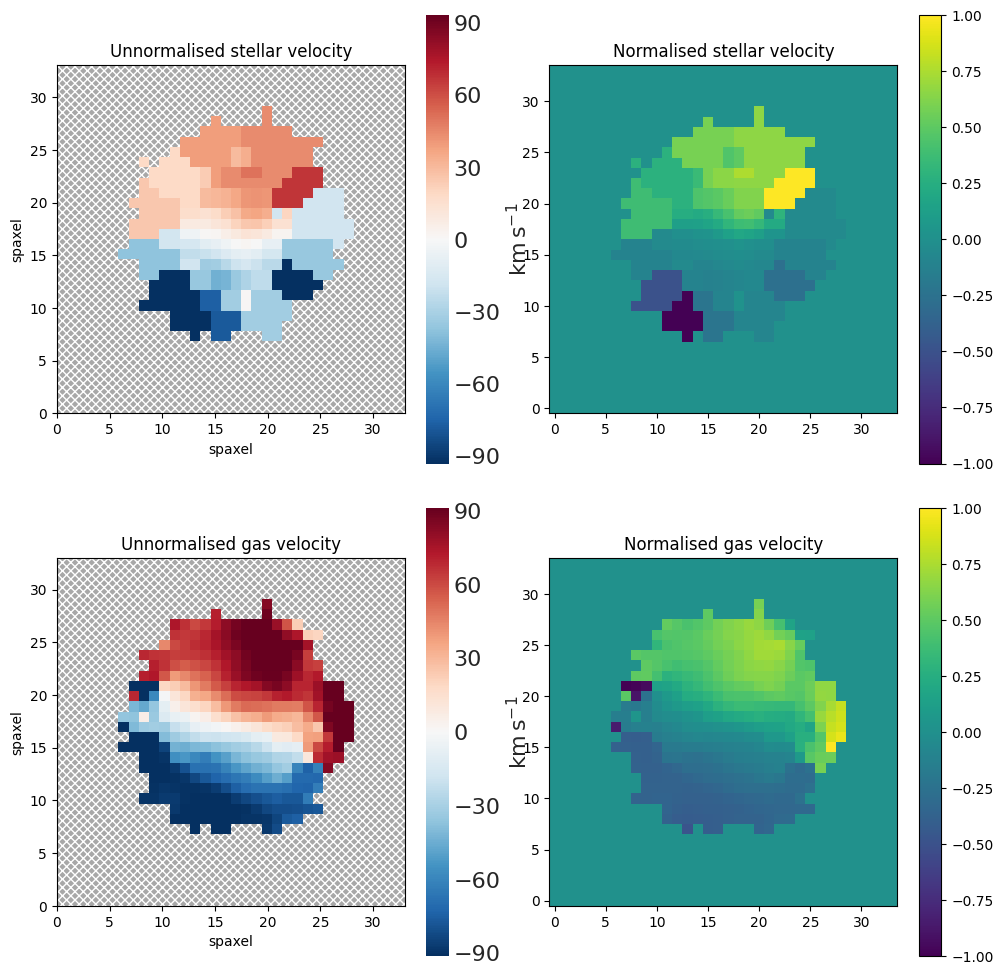

In [11]:
# Stellar velocity
sv_pos = np.maximum(0, sv.value)
sv_neg = np.minimum(0, sv.value)

sv_pos_norm = sv_pos / np.max(sv_pos)
sv_neg_norm = sv_neg / np.abs(np.min(sv_neg))

sv_norm = sv_pos_norm + sv_neg_norm

# Gas velocity
gv_pos = np.maximum(0, gv.value)
gv_neg = np.minimum(0, gv.value)

gv_pos_norm = gv_pos / np.max(gv_pos)
gv_neg_norm = gv_neg / np.abs(np.min(gv_neg))

gv_norm = gv_pos_norm + gv_neg_norm

# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

# Plot unnormalised velocities
sv.plot(fig=fig, ax=ax[0, 0], title="Unnormalised stellar velocity")
gv.plot(fig=fig, ax=ax[1, 0], title="Unnormalised gas velocity")

# Create x and y co-ords for normalised plots
num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
x = np.arange(num_xy)
y = np.arange(num_xy)

# Plot normalised stellar velocity
sv_pcolormesh = ax[0, 1].pcolormesh(x, y, sv_norm, shading="auto")
fig.colorbar(sv_pcolormesh, ax=ax[0, 1])
ax[0, 1].set_title("Normalised stellar velocity")
ax[0, 1].set_aspect('equal')

# Plot normalised gas velocity
gv_pcolormesh = ax[1, 1].pcolormesh(x, y, gv_norm, shading="auto")
fig.colorbar(gv_pcolormesh, ax=ax[1, 1])
ax[1, 1].set_title("Normalised gas velocity")
ax[1, 1].set_aspect('equal')

# Application to Smethurst et al., 2018 Sample

### Stellar Velocity Maps

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be remove

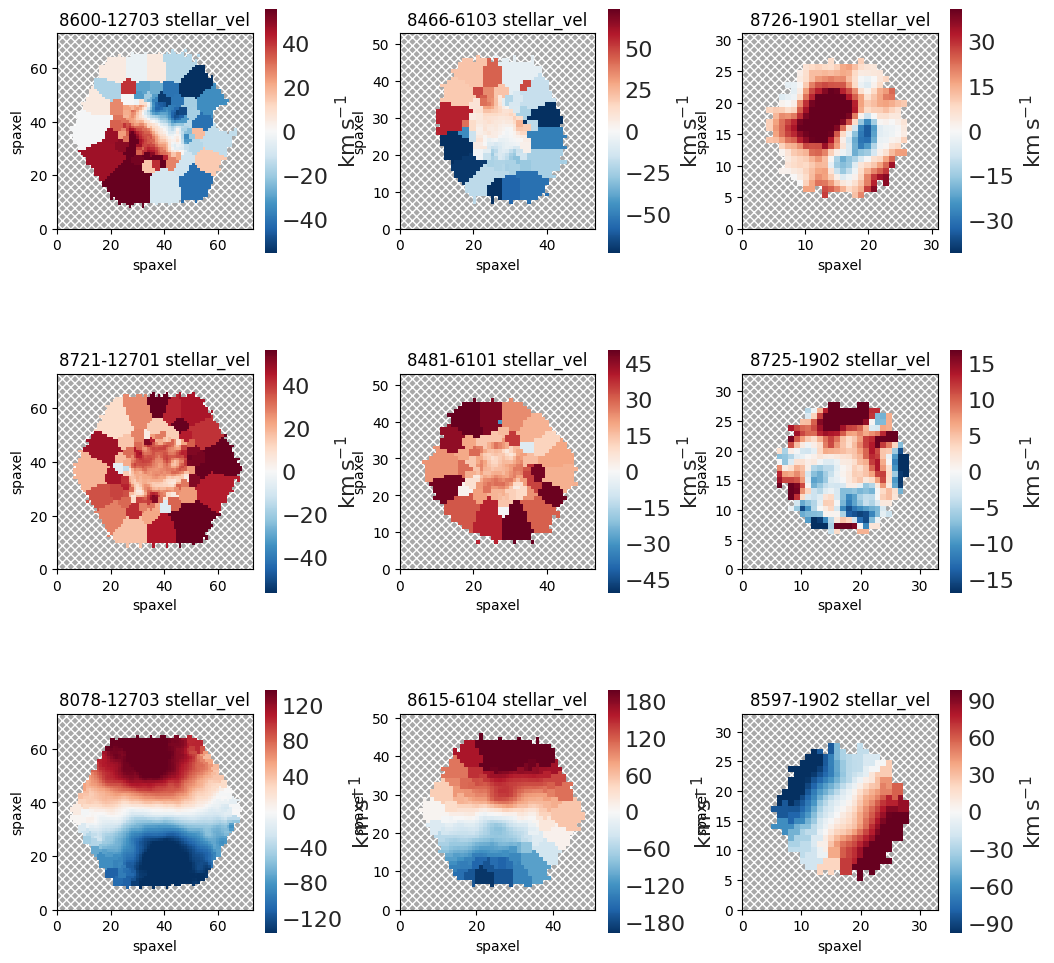

In [12]:
# Plot initial figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[0, i], title=''.join((non_reg_ids[i], ' stellar_vel')))

# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[1, i], title=''.join((slow_rot_ids[i], ' stellar_vel')))

# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[2, i], title=''.join((fast_rot_ids[i], ' stellar_vel')))
    
plt.savefig("Smethurst_2018_Stellar_Velocities.jpg")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

### Gas Velocity Maps (H$\alpha$)

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be remove

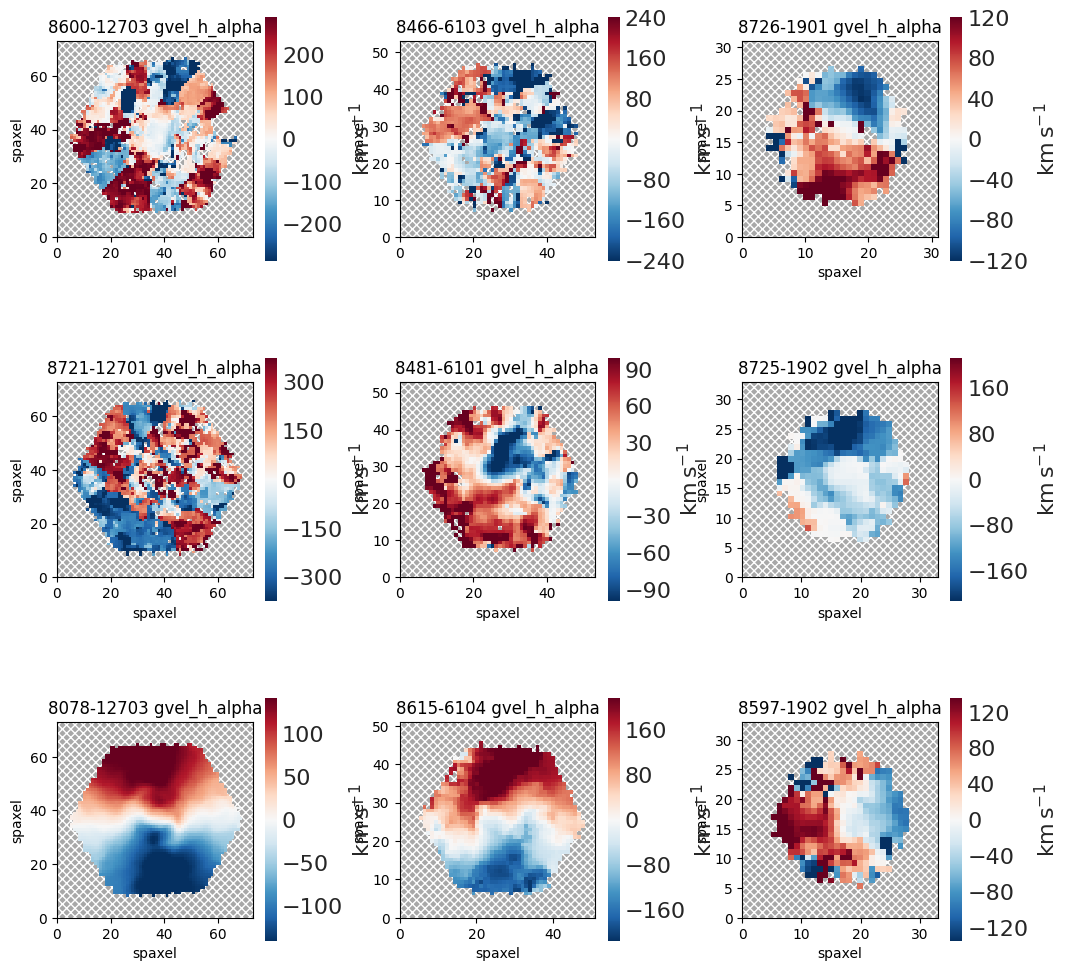

In [13]:
# Plot initial figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[0, i], title=''.join((non_reg_ids[i], ' gvel_h_alpha')))

# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[1, i], title=''.join((slow_rot_ids[i], ' gvel_h_alpha')))

# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[2, i], title=''.join((fast_rot_ids[i], ' gvel_h_alpha')))
    
plt.savefig("Smethurst_2018_Gas_Velocities.jpg")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

### Testing masking/filtering to prevent bad quality data from affecting results

In [97]:
# Load in map of bad quality data
maps = Maps('8615-6104')

# Extract stellar and gas velocity maps
sv = maps.stellar_vel
gv = maps.emline_gvel_ha_6554

# Calculate unaltered residual velocity
dvsg = np.abs(sv.value - gv.value)
dvsg_sum = np.sum(dvsg)

# Create masked data
sv_ma = sv.masked
gv_ma = gv.masked

# Calculate masked residual velocity
dvsg_ma = np.abs(sv_ma - gv_ma)
dvsg_ma_sum = np.sum(dvsg_ma)

# Create gaussian-blurred data
from scipy.ndimage import gaussian_filter
sv_smo = gaussian_filter(sv, sigma=1)
gv_smo = gaussian_filter(gv, sigma=1)

# Calculate gaussian-blurred resiudal velocity
dvsg_smo = np.abs(sv_smo - gv_smo)
dvsg_smo_sum = np.sum(dvsg_smo)

# Create figure
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Create spaxel co-ordinates
num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
x = np.arange(num_xy)
y = np.arange(num_xy)

# Plot unaltered stellar velocity map
sv.plot(fig=fig, ax=ax[0, 0])
ax[0, 0].set_title("Stellar velocity (unaltered)")

# Plot unaltered gas velocity map
gv.plot(fig=fig, ax=ax[0, 1])
ax[0, 1].set_title("Gas velocity (unaltered)")

# Plot unaltered residual velocity map
dvsg_pcolormesh = ax[0, 2].pcolormesh(x, y, dvsg, cmap=cm.binary, shading="auto")
fig.colorbar(dvsg_pcolormesh, ax=ax[0, 2])
ax[0, 2].set_title(r"$|\DeltaV_{\star-g}|$ (unaltered)\ndvsg_ma_sum = " + "{:.2f}".format(dvsg_ma_sum))
ax[0, 2].set_aspect("equal")

# Plot masked stellar velocity map
sv_ma_pcolormesh = ax[1, 0].pcolormesh(x, y, sv_ma, cmap="RdBu_r", shading="auto")
fig.colorbar(sv_ma_pcolormesh, ax=ax[1, 0])
ax[1, 0].set_title("Stellar velocity (masked)")
ax[1, 0].set_aspect('equal')

# Plot masked gas velocity map
gv_ma_pcolormesh = ax[1, 1].pcolormesh(x, y, gv_ma, cmap="RdBu_r", shading="auto")
fig.colorbar(gv_ma_pcolormesh, ax=ax[1, 1])
ax[1, 1].set_title("Gas velocity (masked)")
ax[1, 1].set_aspect('equal')

# Plot masked residual velocity map
dvsg_ma_pcolormesh = ax[1, 2].pcolormesh(x, y, dvsg_ma, cmap=cm.binary, shading="auto")
fig.colorbar(dvsg_ma_pcolormesh, ax=ax[1, 2])
ax[1, 2].set_title(r"$|\DeltaV_{\star-g}|$ (masked)\ndvsg_ma_sum = " + "{:.2f}".format(dvsg_ma_sum))
ax[1, 2].set_aspect("equal")

# Plot smoothed stellar velocity map
sv_ma_pcolormesh = ax[2, 0].pcolormesh(x, y, sv_smo, cmap="RdBu_r", shading="auto")
fig.colorbar(sv_ma_pcolormesh, ax=ax[2, 0])
ax[2, 0].set_title("Stellar velocity (smoothed)")
ax[2, 0].set_aspect('equal')

# Plot smoothed gas velocity map
gv_ma_pcolormesh = ax[2, 1].pcolormesh(x, y, gv_smo, cmap="RdBu_r", shading="auto")
fig.colorbar(gv_ma_pcolormesh, ax=ax[2, 1])
ax[2, 1].set_title("Gas velocity (smoothed)")
ax[2, 1].set_aspect('equal')

# Plot smoothed residual velocity map
dvsg_smo_pcolormesh = ax[2, 2].pcolormesh(x, y, dvsg_smo, cmap=cm.binary, shading="auto")
fig.colorbar(dvsg_smo_pcolormesh, ax=ax[2, 2])
ax[2, 2].set_title(r"$|\DeltaV_{\star-g}|$ (smoothed)\ndvsg_smo_sum = " + "{:.2f}".format(dvsg_smo_sum))
ax[2, 2].set_aspect("equal")

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)
[ERROR]: Traceback (most recent call last):
  File "/Users/Jonah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/Jonah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py", line 341, in __call__
    return printer(obj)
  File "/Users/Jonah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py", line 248, in <lambda>
    png_formatter.for_type(Figure, lambda fig: print_figure(fig, 'png', **kwargs))
 

<Figure size 1500x1500 with 18 Axes>

Plot different calculated rv values against each other

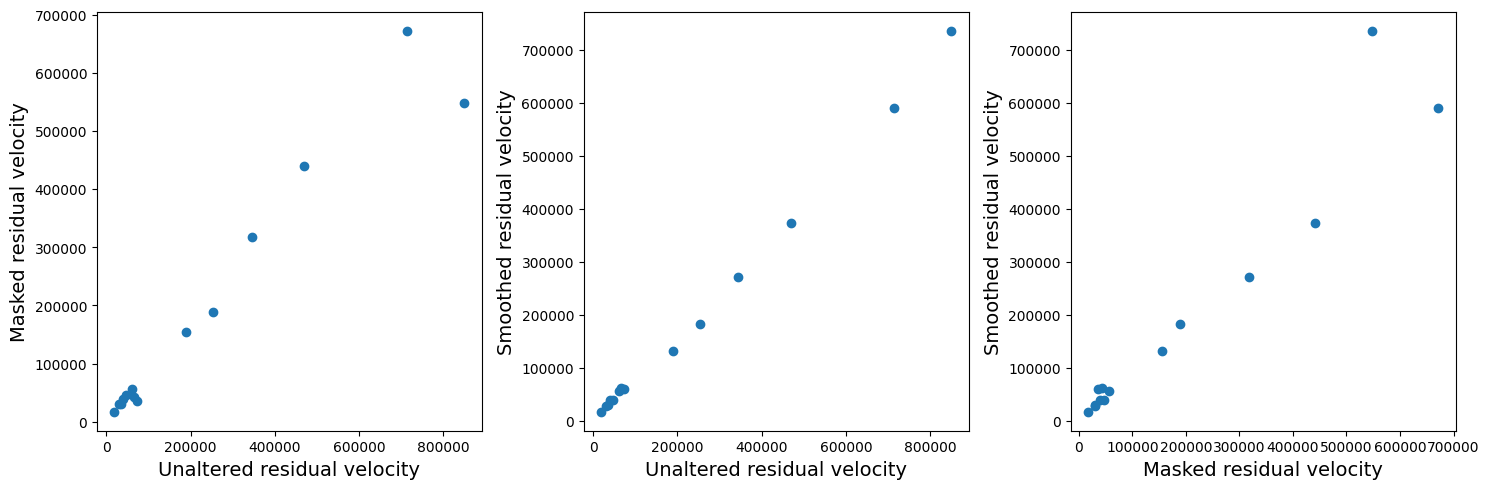

In [68]:
rv_vals_ua = np.array([344983.54, 469331.73, 189491.12, 34451.86, 715319.04, 61264.87, 39689.68, 29688.23,
                       65903.45, 47149.76, 19263.66, 850528.67, 72397.04, 253005.01])  # Unaltered
rv_vals_ma = np.array([317068.12, 440330.35, 154691.57, 30254.62, 671452.99, 55912.99, 39689.68, 29688.23,
                      43337.05, 46407.38, 17300.92, 548104.38, 35197.95, 188683.33])  # Masked
rv_vals_smo = np.array([270429.91, 373503.89, 131004.73, 29055.15, 590587.48, 55301.91, 38994.99, 27840.08,
                       61571.28, 39401.43, 17082.15, 735127.75, 59698.23, 182108.00])  # Smoothed

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(rv_vals_ua, rv_vals_ma)
ax[0].set_xlabel("Unaltered residual velocity", fontsize=14)
ax[0].set_ylabel("Masked residual velocity", fontsize=14)
# ax[0].set_aspect('equal')

ax[1].scatter(rv_vals_ua, rv_vals_smo)
ax[1].set_xlabel("Unaltered residual velocity", fontsize=14)
ax[1].set_ylabel("Smoothed residual velocity", fontsize=14)
# ax[1].set_aspect('equal')

ax[2].scatter(rv_vals_ma, rv_vals_smo)
ax[2].set_xlabel("Masked residual velocity", fontsize=14)
ax[2].set_ylabel("Smoothed residual velocity", fontsize=14)
# ax[2].set_aspect("equal")

plt.tight_layout()

Generally, the methods all scale each other. However, there are some outliers for the masked residual velocity. Examining these directly (e.g., 8615-6104 above) reveals that the smoothed and unaltered residual velocities suffer from anomalous pixels, suggesting that data should be masked going forwards

### Testing data quality of cubes

In [96]:
# Cube with low quality map
from marvin.tools import Cube
cube_low = Cube('11950-6102')
cube_high = Cube('8078-12703')

# Access cube header
cube_low.header
cube_high.header

# Data quality flag
print("low quality flag: ", cube_low.quality_flag)
print("\nhigh quality flag: ", cube_high.quality_flag)

# Targetting flag
print("\nlow target flag: ", cube_low.target_flags)
print("\nhigh target flag: ", cube_high.target_flags)

# Using bitmasks
from marvin.utils.datamodel.maskbit import get_maskbits
marvin_maskbits = get_maskbits("DR17")
marvin_maskbits['MANGA_DRP3QUAL'].labels_to_value("CRITICAL")

low quality flag:  <Maskbit 'MANGA_DRP3QUAL' ['BADDEPTH', 'BADOMEGA', 'BADFLUX', 'BLOWTORCH', 'CRITICAL']>

high quality flag:  <Maskbit 'MANGA_DRP3QUAL' ['BLOWTORCH']>

low target flag:  [<Maskbit 'MANGA_TARGET1' []>, <Maskbit 'MANGA_TARGET2' []>, <Maskbit 'MANGA_TARGET3' ['SN_ENV']>]

high target flag:  [<Maskbit 'MANGA_TARGET1' ['PRIMARY_v1_2_0']>, <Maskbit 'MANGA_TARGET2' []>, <Maskbit 'MANGA_TARGET3' []>]


1073741824